In [281]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import sys
sys.path.append("../src") if "../src" not in sys.path else None # avoid adding multiple relave paths to sys.path

In [283]:
from Agent import Agent
from Environment import Rectangle
from Brain import Brain

In [284]:
boxsize=(2.2, 2.2)
origo=(0,0)
soft_boundary=0.2

In [318]:
env = Rectangle(boxsize=boxsize, soft_boundary=soft_boundary)
npcs=10
brain = Brain(env, npcs, 0.1)
#avoid_walls = env.avoid_walls
env.add_wall(name="free_wall1", bias=np.array([0.401,0.403]),slope=np.array([0.8,0.8]),t=[0,1])

Singular matrix
Singular matrix


In [319]:
board = env.get_board()

In [320]:
board.shape

(32, 32, 2)

In [321]:
brain.pcs.shape

(10, 2)

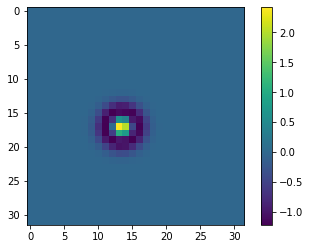

In [322]:
exmp_pc = brain.pcs[0]
Z = np.zeros(board.shape[:-1])
for i in range(board.shape[0]):
    for j in range(board.shape[1]):
        #print(board[i,j],exmp_pc)
        d = brain.d_pcc(board[i,j],exmp_pc)
        tmp = brain.ricker_response(d) # or norm_response
        #print(tmp)
        Z[i,j] = tmp

plt.imshow(Z)
plt.colorbar()

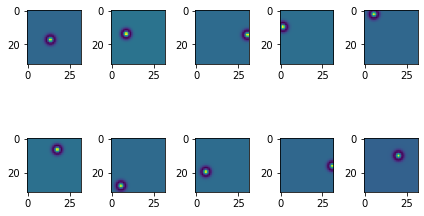

In [323]:
ncols,nrows = 5,2
fig,axs=plt.subplots(ncols=ncols,nrows=nrows)

for cols in range(ncols):
    for rows in range(nrows):
        Z = np.zeros(board.shape[:-1])
        for i in range(board.shape[0]):
            for j in range(board.shape[1]):
                tmp = brain.d_pcc(board[i,j],brain.pcs[cols*nrows+rows])
                tmp = brain.ricker_response(tmp)
                Z[i,j] = tmp
            
        
        axs[rows,cols].imshow(Z)
        
plt.tight_layout()